# Body segment parameters

> Marcos Duarte  
> Laboratory of Biomechanics and Motor Control ([http://demotu.org/](http://demotu.org/))  
> Federal University of ABC, Brazil

<figure><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Da_Vinci_Vitruve_Luc_Viatour.jpg/353px-Da_Vinci_Vitruve_Luc_Viatour.jpg' width="240" alt="Vitruvian Man" style="float:right;margin: 0 0 0 3px;"/></figure>

<i>"Le proporzioni del corpo umano secondo Vitruvio", also known as the <a href="https://en.wikipedia.org/wiki/Vitruvian_Man" target="_blank">Vitruvian Man</a>, drawing by <a href="https://en.wikipedia.org/wiki/Leonardo_da_Vinci" target="_blank">Leonardo da Vinci</a> circa 1490 based on the work of <a href="https://en.wikipedia.org/wiki/Vitruvius" target="_blank">Marcus Vitruvius Pollio</a> (1st century BC), depicting a man in supposedly ideal human proportions (image from <a href="https://en.wikipedia.org/wiki/Vitruvian_Man" target="_blank">Wikipedia</a>).</i>
<br><br>

Body segment parameters (BSP) of the human body, such as length, area, volume, mass, density, center of mass, moment of inertia, and center of volume, are fundamental for the application of mechanics to the understanding of human movement. Anthropometry is the field concerned with the study of such measurements of the human body. Frequently, one cannot measure most of these parameters of each segment of an individual and these quantities are estimated by indirect methods. The main indirect methods are based in data of cadavers (e.g. Dempster's model), body image scanning of living subjects (e.g., Zatsiorsky-Seluyanov's model), and geometric measurements (e.g., Hanavan's model). See [http://kwon3d.com/theory/bsp.html](http://kwon3d.com/theory/bsp.html) and [Human Body Properties Database: Body Segment Parameters](https://www.dh.aist.go.jp/database/properties/index-e.html) for more information on these models.  

For a review on different methods employed in the determination of BSP, see Drills et al. (1964), Contini (1972), Bjørnstrup (1995), Zatsiorsky (2002) and Nigg and Herzog (2006).  

There is at least one Python library for the calculation of human body segment parameters, see Dembia et al. (2014), it implements the Yeadon human inertia geometric model.

## Estimation of body segment parameters

Next, let's look on how to estimate some of the BSP using the anthropometric model of Dempster (1955) with some parameters adapted by Winter (2009) and the model of Zatsiorsky and Seluyanov (Zatsiorsky, 2002), from now on, Zatsiorsky, with parameters adjusted by de Leva (1996).

For a table with BSP values, also referred as anthropometric table, typically:   

+ The mass of each segment is given as fraction of the total body mass.   
+ The center of mass (CM) position in the sagittal plane of each segment is given as fraction of the segment length with respect to the proximal or distal joint position.
+ The radius of gyration (Rg) around the transverse axis (rotation at the sagittal plane) and around other axes of each segment is given as fraction of the segment length with respect to (w.r.t.) the center of mass or w.r.t. the proximal or w.r.t. the distal joint position.

First let's look at the Dempster's and Zatsiorsky's anthropometric tables before presenting mathematical definitions for these parameters.

In [1]:
# Import the necessary libraries
from IPython.display import display, Math, Latex
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('max_colwidth', 100)

### Dempster's model adapted by Winter

In [2]:
BSP_Dmarks = pd.read_csv('./../data/BSPlandmarks_Dempster.txt', sep='\t')
display(Latex('BSP segments from Dempster\'s model adapted by Winter (2009):'))
display(BSP_Dmarks)

<IPython.core.display.Latex object>

,Segment,Definition
0,Hand,Wrist axis/knuckle II middle finger
1,Forearm,Elbow axis/ulnar styloid
2,Upper arm,Glenohumeral axis/elbow axis
3,Forearm and hand,Elbow axis/ulnar styloid
4,Total arm,Glenohumeral joint/ulnar styloid
5,Foot,Lateral malleolus/head metatarsalII
6,Leg,Femoral condyles/medial malleolus
7,Thigh,Greater trochanter/femoral condyles
8,Foot and leg,Femoral condyles/medial malleolus
9,Total leg,Greater trochanter/medial malleolus


In [3]:
bsp_D = pd.read_csv('./../data/BSP_DempsterWinter.txt', index_col=0, sep='\t')
display(Latex('BSP values from Dempster\'s model adapted by Winter (2009):'))
display(bsp_D)

<IPython.core.display.Latex object>

,Definition,Mass,CM prox,CM dist,Rg CM,Rg prox,Rg dist
Segment,,,,,,,
Hand,WJC-KNU2,0.0060,0.506,0.494,0.297,0.587,0.577
Forearm,EJC-STYL,0.0160,0.430,0.570,0.303,0.526,0.647
Upper arm,SJC-EJC,0.0280,0.436,0.564,0.322,0.542,0.645
Forearm hand,EJC-STYL,0.0220,0.682,0.318,0.468,0.827,0.565
Total arm,SJC-STYL,0.0500,0.530,0.470,0.368,0.645,0.596
Foot,LMAL-MT2,0.0145,0.500,0.500,0.475,0.690,0.690
Leg,KJC-MMAL,0.0465,0.433,0.567,0.302,0.528,0.643
Thigh,GTR-KJC,0.1000,0.433,0.567,0.323,0.540,0.653
Head neck,C7T1-RIB1EAR,0.0810,1.000,0.000,0.495,0.116,NaN


### Zatsiorsky's model adjusted by de Leva

The segments defined in the Zatsiorsky's model (Zatsiorsky, 2002) adjusted by de Leva (1996) are illustrated in the next figure.

<figure><img src='./../images/BSP_ZdeLeva.png' alt='Zatsiorsky anthropometric model'/> <figcaption><center><i>Figure. Segment definition employed in the anthropometric model of Zatsiorsky and Seluyanov (Zatsiorsky, 2002) adjusted by de Leva (1996).<br>Image from a <a href="http://motionanalysis.com/" target="_blank">Motion Analysis Corporation</a> manual.</i></center></figcaption> </figure>

In [4]:
BSP_Zmarks = pd.read_csv('./../data/BSPlandmarks_ZdeLeva.txt', sep='\t')
display(Latex('BSP landmarks from Zatsiorsky\'s model' +
              ' adjusted by de Leva (1996):'))
display(BSP_Zmarks)

<IPython.core.display.Latex object>

,Landmark Name,Abbreviation,Description
0,Acromion,ACRO,Most lateral point on the lateral edge of the acromial process of the scapula
1,Acropodion,TTIP,Tip of longest toe
2,Bispinous breadth,BB,Distance between two ASIS
3,Cervicale,CERV,Superior tip of the spine of the 7th certical vertebra
4,Dactylion (3rd),DAC3,Tip of 3 rd digit
5,Gonion,GONI,Most lateral point on the posterior angle of mandible
6,Iliospinale,ASIS,Inferior point of one of the anterior superior iliac spines
7,Malleoli,"MMAL, LMAL",Medial and lateral bony projections of the malleolus
8,Metacarpale (3rd),MET3,Distal palpable point on the metacarpal of the 3rd digit on the dorsal hand
9,Mid-gonion,MIDG,Point midway between 2 gonion


In [5]:
bsp_Zf = pd.read_csv('./../data/BSPfemale_ZdeLeva.txt', index_col=0, sep='\t')
display(Latex('BSP female values from Zatsiorsky\'s model' +
              ' adjusted by de Leva (1996):'))
display(bsp_Zf)

<IPython.core.display.Latex object>

,Endpoints,Mass,CM Long,Rg Sag,Rg Trans,Rg Long
Segment,,,,,,
Head,VERT-MIDG,0.0668,0.5894,0.330,0.359,0.318
Trunk,SUPR-MIDH,0.4257,0.4151,0.357,0.339,0.171
Upper trunk,SUPR-XYPH,0.1545,0.2077,0.746,0.502,0.718
Middle trunk,XYPH-OMPH,0.1465,0.4512,0.433,0.354,0.415
Lower trunk,OMPH-MIDH,0.1247,0.4920,0.433,0.402,0.444
Upper arm,SJC-EJC,0.0255,0.5754,0.278,0.260,0.148
Forearm,EJC-WJC,0.0138,0.4559,0.261,0.257,0.094
Hand,WJC-MET3,0.0056,0.7474,0.531,0.454,0.335
Thigh,HJC-KJC,0.1478,0.3612,0.369,0.364,0.162


In [6]:
bsp_Zm = pd.read_csv('./../data/BSPmale_ZdeLeva.txt', index_col=0, sep='\t')
display(Latex('BSP male values from Zatsiorsky\'s model' +
              ' adjusted by de Leva (1996):'))
display(bsp_Zm)

<IPython.core.display.Latex object>

,Endpoints,Mass,CM Long,Rg Sag,Rg Trans,Rg Long
Segment,,,,,,
Head,VERT-MIDG,0.0694,0.5976,0.362,0.376,0.312
Trunk,SUPR-MIDH,0.4346,0.4486,0.372,0.347,0.191
Upper trunk,SUPR-XYPH,0.1596,0.2999,0.716,0.454,0.659
Middle trunk,XYPH-OMPH,0.1633,0.4502,0.482,0.383,0.468
Lower trunk,OMPH-MIDH,0.1117,0.6115,0.615,0.551,0.587
Upper arm,SJC-EJC,0.0271,0.5772,0.285,0.269,0.158
Forearm,EJC-WJC,0.0162,0.4574,0.276,0.265,0.121
Hand,WJC-MET3,0.0061,0.7900,0.628,0.513,0.401
Thigh,HJC-KJC,0.1416,0.4095,0.329,0.329,0.149


### Differences between the anthropometric models from Dempster and Zatsiorsky

The anthropometric models from Dempster and Zatsiorsky are different in many aspects: Dempster's model is based on the data of 8 cadavers of older male individuals (but two of the individuals were of unknown age) analyzed in the United States. Zatsiorsky's model is based on image scanning of 100 young men and 15 young women, at the time all students of a military school in the former Soviet Union.

The difference between models for some segments is huge (see table below): the mass fraction of the thigh segment for Zatsiorsky's model is more than 40% larger than for the Dempster's model, inversely, the trunk segment has about 15% lower mass fraction for Zatisorsky's model. Also, note that some of the  segments don't have the same definition in the two models.

In [7]:
m_D = bsp_D.loc[['Foot', 'Leg', 'Thigh', 'Pelvis', 'Abdomen', 'Thorax', 'Trunk',
                   'Upper arm', 'Forearm', 'Hand', 'Head neck'], 'Mass']
m_Zf = bsp_Zf.loc[['Foot', 'Shank', 'Thigh', 'Lower trunk', 'Middle trunk', 'Upper trunk',
                   'Trunk', 'Upper arm', 'Forearm', 'Hand', 'Head'], 'Mass']
m_Zm = bsp_Zm.loc[['Foot', 'Shank', 'Thigh', 'Lower trunk', 'Middle trunk', 'Upper trunk',
                   'Trunk', 'Upper arm', 'Forearm', 'Hand', 'Head'], 'Mass']
m_D.index = m_Zf.index  # because of different names for some segments

display(Latex("Mass fraction difference (in %) of Zatsiorsky's model w.r.t. Dempster's model"))
d = pd.DataFrame({'Females': np.around(100 * (m_Zf - m_D) / m_D), \
                  'Males': np.around(100 * (m_Zm - m_D) / m_D)})
display(d)

<IPython.core.display.Latex object>

,Females,Males
Segment,,
Foot,-11.0,-6.0
Shank,3.0,-7.0
Thigh,48.0,42.0
Lower trunk,-12.0,-21.0
Middle trunk,5.0,17.0
Upper trunk,-28.0,-26.0
Trunk,-14.0,-13.0
Upper arm,-9.0,-3.0
Forearm,-14.0,1.0


## Center of mass

[Center of mass](https://en.wikipedia.org/wiki/Center_of_mass) is the average position of the masses of a system. More formally, the center of mass of an object is the unique point at the center of a distribution of mass in space that has the property that the weighted position vectors relative to this point sum to zero. By [mass](https://en.wikipedia.org/wiki/Mass) we mean the inertial mass, a quantitative measure of an object's resistance to acceleration. The mathematical definition for the position of the center of mass, $\mathbf{r}_{cm}$, of a system with N objects, each with mass $m_i$ and position $\mathbf{r}_i$ is:

$$ \sum_{i=1}^N m_{i}(\mathbf{r}_i - \mathbf{r}_{cm}) = 0 $$

Solving this equation for $\mathbf{r}_{cm}$, we obtain:

$$ \mathbf{r}_{cm} = \frac{1}{M}\sum_{i=1}^N m_{i}\mathbf{r}_i \quad \text{where} \quad M = \sum_{i=1}^N m_{i} $$   

If we rearrange the equation above, we can see that the center of mass is the unique point that when multiplied by the total mass is equal to the sum of each mass multiplied by its corresponding position:

$$ M\mathbf{r}_{cm} = \sum_{i=1}^N m_{i}\mathbf{r}_i $$

Using this property, several problems in mechanics can be solved considering only the total mass and the center of mass instead of each particle of a system.

A related quantity is the [center of gravity](https://en.wikipedia.org/wiki/Center_of_mass#Center_of_gravity), which is the point in an object around which the resultant torque due to gravity forces vanishes. Near the Earth's surface, where the gravity force acts downward as a parallel force field, for an object with dimensions much smaller that the Earth radius, the positions of the center of gravity and of the center of mass are the same for practical purposes in biomechanics.

Using the data of the body segment parameters table, the center of mass of a single segment $i$ is (see figure below):

$$r_{i} = r_{i,p} + \text{bsp[i,cmp]} * (r_{i,d}-r_{i,p})$$

Where $r_{i,p}$ and $\:r_{i,d}$ are the positions of the proximal and distal landmarks used to define the $i$ segment.   
Note that $r$ is a vector and may have more than one dimension. The equation for the center of mass is valid in each direction and the calculations are performed independently in each direction. In addition, there is no need to include the mass of the segment in the equation above; the mass of the segment is used only when there is more than one segment. 

For example, given the following coordinates ($x, y$) for the MT2, ankle, knee and hip joints:

In [8]:
r = np.array([[101.1, 1.3], [84.9, 11.0], [86.4, 54.9], [72.1, 92.8]])/100
display(np.around(r, 3))

array([[1.011, 0.013],
       [0.849, 0.11 ],
       [0.864, 0.549],
       [0.721, 0.928]])

The position of the center of mass of each segment and of the lower limb are:

In [9]:
M = bsp_D.loc[['Foot', 'Leg', 'Thigh'], 'Mass'].sum()
rcm_foot  = r[1] + bsp_D.loc['Foot', 'CM prox']*(r[0]-r[1])
rcm_leg   = r[2] + bsp_D.loc['Leg',  'CM prox']*(r[1]-r[2])
rcm_thigh = r[3] + bsp_D.loc['Thigh','CM prox']*(r[2]-r[3])
rcm = (bsp_D.loc['Foot','Mass']*rcm_foot + bsp_D.loc['Leg','Mass']*rcm_leg + \
       bsp_D.loc['Thigh','Mass']*rcm_thigh)/M
print('Foot CM: ', np.around(rcm_foot, 3), 'm')
print('Leg CM: ', np.around(rcm_leg, 3), 'm')
print('Thigh CM: ', np.around(rcm_thigh, 3), 'm')
print('Lower limb CM: ', np.around(rcm, 3), 'm')

Foot CM:  [0.93  0.062] m
Leg CM:  [0.858 0.359] m
Thigh CM:  [0.783 0.764] m
Lower limb CM:  [0.818 0.584] m


And here is a geometric representation of part of these calculations:

<IPython.core.display.Javascript object>


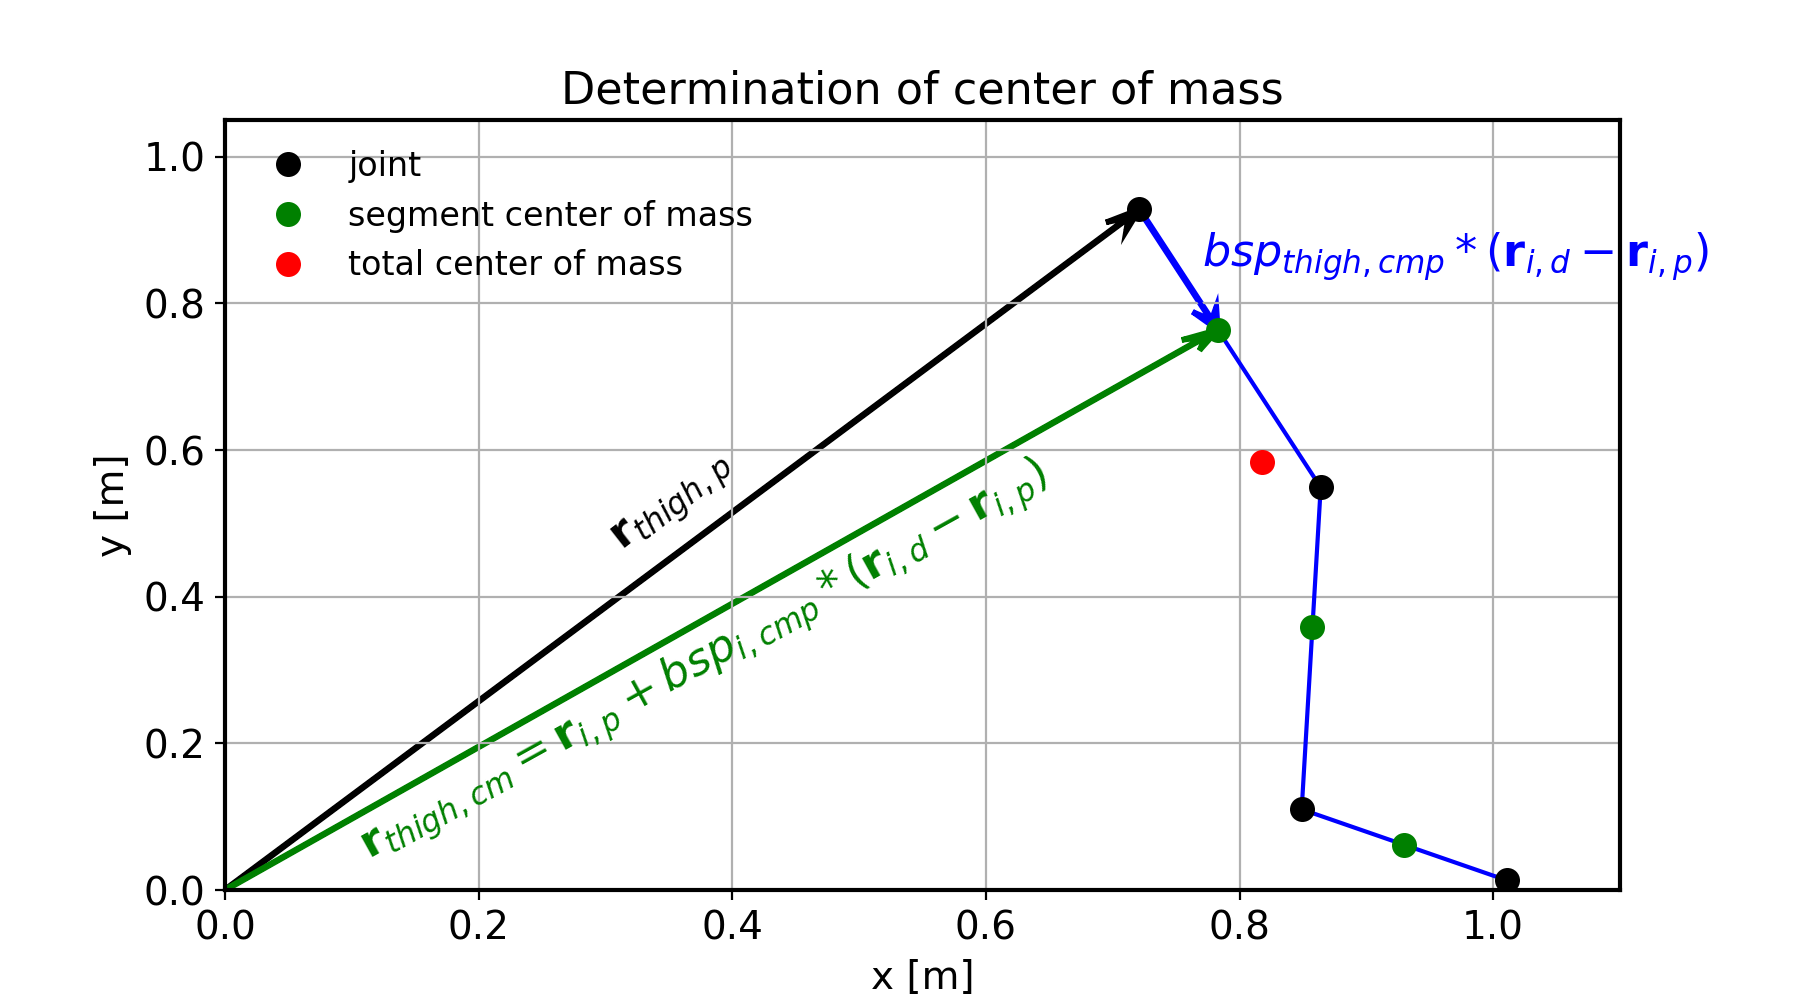

/Users/marcos/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:2668: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


In [10]:
plt.rc('axes',  labelsize=14, linewidth=1.5) 
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.rc('lines', markersize=8) 
hfig, hax = plt.subplots(1, 1, figsize=(9, 5))

# bones and joints
plt.plot(r[:,0], r[:,1], 'b-')
plt.plot(r[:,0], r[:,1], 'ko', label='joint')
# center of mass of each segment
plt.plot(rcm_foot[0], rcm_foot[1], 'go', label='segment center of mass')
plt.plot(rcm_leg[0], rcm_leg[1], 'go', rcm_thigh[0], rcm_thigh[1], 'go')
# total center of mass
plt.plot(rcm[0], rcm[1], 'ro', label='total center of mass')
hax.legend(frameon=False, loc='upper left', fontsize=12, numpoints=1)
plt.arrow(0, 0, r[3,0], r[3,1], 'b', head_width=0.02, overhang=.5, fc="k", ec="k", lw=2,
          length_includes_head=True)
plt.arrow(r[3,0], r[3,1], rcm_thigh[0] - r [3,0], rcm_thigh[1] - r[3,1], head_width=0.02,
      overhang=.5, fc="b", ec="b", lw=2, length_includes_head=True)
plt.arrow(0, 0, rcm_thigh[0], rcm_thigh[1], head_width=0.02, overhang=.5, fc="g", ec="g",
          lw=2, length_includes_head=True)
plt.text(0.30, .57, '$\mathbf{r}_{thigh,p}$', rotation=38, fontsize=16)
plt.text(0.77, .85, '$bsp_{thigh,cmp}*(\mathbf{r}_{i,d}-\mathbf{r}_{i,p})$',
         fontsize=16, color='b')
plt.text(0.1, .55,
         '$\mathbf{r}_{thigh,cm}=\mathbf{r}_{i,p}+bsp_{i,cmp}*' +
         '(\mathbf{r}_{i,d}-\mathbf{r}_{i,p})$',
         rotation=29, fontsize=16, color='g')
hax.set_xlim(0,1.1)
hax.set_ylim(0,1.05)
hax.set_xlabel('x [m]')
hax.set_ylabel('y [m]')
hax.set_title('Determination of center of mass', fontsize=16)
hax.grid()

### Center of mass of a body with continuous distribution of mass

If the mass distribution of the body is continuous over a volume and each element of mass has [density](https://en.wikipedia.org/wiki/Density), mass per unit volume, $\rho(r),\:$ the position of the center of mass is given by:

$$ \mathbf{r}_{cm} \;=\; \frac{1}{M}\int_0^M \mathbf{r}\:dm \;=\; \frac{1}{M}\int_0^V \mathbf{r}\rho(r)\:dV $$

For example, the center of mass of a uniform rod with total mass M and length L along to its main axis x is:

$$ \mathbf{r}_{cm} \;=\; \frac{1}{M}\int_0^L x\frac{M}{L}\:dx = \frac{1}{M}\frac{M}{L}\left.\frac{x^2}{2}\right|_0^L = \frac{L}{2} $$

For a rod with M = 1 kg and L = 1 m, $\mathbf{r}_{cm}$ = 0.5 m.

### Center of volume  

Analogous to the center of mass, the center of volume is the unique point at the center of a distribution of volume in space that has the property that the weighted position vectors relative to this point sum to zero. If the density of the object doesn't vary, center of volume and center of mass are in the same position.

### Center of buoyancy  
[Center of buoyancy](https://en.wikipedia.org/wiki/Buoyancy) is the center of the volume of water which the submerged part of an object displaces. Center of buoyancy is to center of volume as center of gravity is to center of mass.

## Moment of inertia

[Moment of inertia](https://en.wikipedia.org/wiki/Moment_of_inertia) (or rotational inertia), analogous to mass, is a quantitative measure of the resistance to rotational acceleration about an axis of a distribution of mass in space. The mathematical definition for the moment of inertia, $I$, of a system with N objects rotating around an axis, each with mass $m_i$ and distance $r_i$ to this axis is:

$$ I = \sum_{i=1}^N m_{i}r_{i}^2 $$

This equation for the moment of inertia can be intuitively deduced if we consider the kinetic energy of a system with $N$ particles each at a distance $r_i$ all rotating around a fixed axis:

$$ E_k = \frac{1}{2}\sum_{i=1}^N m_{i}v_{i}^2 = \frac{1}{2}\sum_{i=1}^N m_{i}(\omega_ir_{i})^2 = \frac{1}{2}\omega^2\sum_{i=1}^N m_{i}r_{i}^2 $$

The term multiplying the rotational speed at the rightmost equation is the system's moment of inertia for rotation.

The value of the moment of inertia is a single scalar for a two-dimensional object or a tensor (a symmetric 3×3 inertia matrix) for a three-dimensional object (we will see that later).

### Radius of gyration

[Radius of gyration](https://en.wikipedia.org/wiki/Radius_of_gyration) is the distance from the axis that all mass can be concentrated to obtain the same moment of inertia of the object. The mathematical definition for the radius of gyration, $R_g$, is:

$$ I = M R_g^2 \quad \Rightarrow \quad R_g = \sqrt{\frac{I}{M}} = \sqrt{\frac{\sum_{i=1}^N m_{i}r_{i}^2}{\sum_{i=1}^N m_{i}}} $$

The radius of gyration (as a fraction of the segment length) is the quantity that is given in the table of body segment parameters. Because of that, we don't need to sum each element of mass of the segment to calculate its moment of inertia; we just need to take the mass of the segment times the radius or gyration squared.

Using the body segment parameters, the moment of inertia of a single segment $i$ rotating around its own center of mass is (see figure below):

$$ I_{i,cm} = M * \text{bsp[i,mass]} * \left(\text{bsp[i,rgcm]} * ||r_{i,d}-r_{i,p}||\right)\:^2 $$

Where $M$ is the total body mass of the subject and $||r_{i,d}-r_{i,p}||$ is the length of the segment $i$.

For example, the moment of inertia of each segment of the lower limb around each corresponding segment center of mass considering the coordinates (x, y) for the MT2, ankle, knee and hip joints given above are:

In [11]:
norm = np.linalg.norm
M = 100 # body mass
Icm_foot = M*bsp_D.loc['Foot', 'Mass']*((bsp_D.loc['Foot', 'Rg CM']*norm(r[0]-r[1]))**2)
Icm_leg = M*bsp_D.loc['Leg',  'Mass']*((bsp_D.loc['Leg',  'Rg CM']*norm(r[1]-r[2]))**2)
Icm_thigh = M*bsp_D.loc['Thigh','Mass']*((bsp_D.loc['Thigh','Rg CM']*norm(r[2]-r[3]))**2)
print('Icm foot: ', np.around(Icm_foot, 3), 'kgm2')
print('Icm leg: ', np.around(Icm_leg, 3), 'kgm2')
print('Icm thigh: ', np.around(Icm_thigh, 3), 'kgm2')

Icm foot:  0.012 kgm2
Icm leg:  0.082 kgm2
Icm thigh:  0.171 kgm2


### Parallel axis theorem

The value of the moment of inertia is by definition dependent of the distance of the mass to the axis of rotation. This is the reason the radius of gyration in the table above is given for three different axis (center of mass and proximal and distal joint positions). In case we want the moment of inertia of an object around a different parallel axis than the axis passing through the center of mass, we can use the [parallel axis theorem](https://en.wikipedia.org/wiki/Parallel_axis_theorem), which states that the moment of inertia about a parallel axis is the moment of inertia around the center of mass plus the moment of inertia of the body treated as a point mass at this new axis location:

$$ I_{new\:axis}\;=\;I_{cm}\;+\;md_{new\:axis\:to\:cm}^2 $$

The sum at the right side involves two positive terms; this means that the smallest possible moment of inertia is around the center of mass.

For example, using the parallel axis theorem the moment of inertia of the lower limb around its center of mass is:

In [12]:
Icmll = (Icm_foot  + M*bsp_D.loc['Foot', 'Mass']*norm(rcm-rcm_foot )**2 + \
         Icm_leg   + M*bsp_D.loc['Leg',  'Mass']*norm(rcm-rcm_leg  )**2 + \
         Icm_thigh + M*bsp_D.loc['Thigh','Mass']*norm(rcm-rcm_thigh)**2)

print('Icm lower limb: ', np.around(Icmll, 3), 'kgm2')

Icm lower limb:  1.257 kgm2


To calculate the moment of inertia of the lower limb around the hip, we use again the parallel axis theorem:

In [13]:
Ihipll = (Icm_foot  + M*bsp_D.loc['Foot', 'Mass']*norm(r[3]-rcm_foot )**2 + \
          Icm_leg   + M*bsp_D.loc['Leg',  'Mass']*norm(r[3]-rcm_leg  )**2 + \
          Icm_thigh + M*bsp_D.loc['Thigh','Mass']*norm(r[3]-rcm_thigh)**2)

print('Ihip lower limb: ', np.around(Ihipll, 3), 'kgm2')

Ihip lower limb:  3.317 kgm2


Note that for the correct use of the parallel axis theorem we have to input the moment of inertia around the center of mass of each body. For example, we CAN NOT calculate the moment of inertia around the hip with the moment of inertia of the entire lower limb:

In [14]:
# THIS IS WRONG:
I = (Icm_foot  + M*bsp_D.loc['Foot', 'Mass']*norm(r[3]-rcm)**2 + \
     Icm_leg   + M*bsp_D.loc['Leg',  'Mass']*norm(r[3]-rcm)**2 + \
     Icm_thigh + M*bsp_D.loc['Thigh','Mass']*norm(r[3]-rcm)**2)

print('Icm lower limb: ', np.around(I, 3), 'kgm2. THIS IS WRONG!')

Icm lower limb:  2.324 kgm2. THIS IS WRONG!


#### Proof of the parallel axis theorem

Let's deduce the parallel axis theorem for a one-dimensional problem.  
Consider a system with $N$ particles each at a distance $r_i$ from the system's center of mass and that the moment of inertia of this system around an axis perpendicular to the direction where the masses are located along is $I_{cm}$ as illustrated in the figure below:
 
<figure><img src='./../images/parallel_axis.png' width=300 alt='parallel axis'/> <figcaption><center><i>Figure. System of particles and the moment of inertia around two parallel axes.</i></center></figcaption> </figure>

We want to find the moment of inertia around another axis, $I_o$, which is parallel to the axis passing through the center of mass. Using the definition for moment of inertia:

$$ I_o = \sum_{i=1}^N m_{i}r_{i,o}^2 $$

Where $r_{i,o}$ is the distance of each particle to the new reference (axis $I_o$).

We can rewrite the distance $r_{i,o}$ as a sum of the distance of the particle to the axis passing through the center of mass, $r_{i,cm}$, and the distance of the center of mass to the new axis, $r_{o-cm}$ (which is the same value for all particles):

$$ I_o = \sum_{i=1}^N m_{i}(r_{i,cm} + r_{o-cm})^2 $$

Which can be expanded to:

$$ I_o = \sum_{i=1}^N m_{i}r_{i,cm}^2 + 2r_{o-cm}\sum_{i=1}^N m_{i}r_{i,cm} + r_{o-cm}^2\sum_{i=1}^N m_{i} $$

But by definition the center of mass is the average position of the masses of a system, consequently the second term at the right side is zero, then:

$$ I_o = I_{cm} + Mr_{o-cm}^2 $$

Which is the expression given by the parallel axis theorem.

### Moment of inertia of a body with continuous distribution of mass

If the mass distribution of the body is continuous over a volume and each element of mass has density $\rho(r)$, the value of the moment of inertia of the body rotating around an axis passing through the origin is given by:

$$ I = \int_0^M r^2\:dm \;=\; \int_0^V \mathbf{r}^2\rho(r)\:dV $$

For example, the moment of inertia of a uniform rod with total mass M and length L rotating around an axis passing through its center of mass and perpendicular to its main axis x is:

$$ I = \int_{-L/2}^{L/2} x^2\frac{M}{L}\:dx = \frac{M}{L}\left.\frac{x^3}{3}\right|_{-L/2}^{L/2} = M\frac{L^2}{12} $$

For a rod with M = 1 kg and L = 1 m, I = 0.083 kgm$^2$.

If now the axis of rotation passes through one of its extremities and it is parallel to the former axis passing through the center of mass, the rod moment of inertia is:

$$ I = \int_{0}^{L} x^2\frac{M}{L}\:dx = \frac{M}{L}\left.\frac{x^3}{3}\right|_0^L = M\frac{L^2}{3} $$

For a rod with M = 1 kg and L = 1 m, I = 0.333 kgm$^2$.

We could have calculated this moment of inertia using the parallel axis theorem:

$$ I = I_{cm} + md^2_{new\:axis\:to\:cm}\;= M\frac{L^2}{12} + M\left(\frac{L}{2}\right)^2 = M\frac{L^2}{3} $$

### Inertia tensor

The moment of inertia is dependent on the axis around which the body rotates and the axes (system of coordinates) we chose to describe the body (volume) in space. In a general form, considering these two sets of axes in 3D space, the moment of inertia of a body is given by the following tensor:

$$ I = \begin{bmatrix}
I_{xx} & I_{xy} & I_{xz} \\\ 
I_{yx} & I_{yy} & I_{yz} \\\ 
I_{zx} & I_{zx} & I_{zz} 
\end{bmatrix} $$

This matrix is symmetric: $I_{xy}=I_{yx};\, I_{xz}=I_{zx};\, I_{yz}=I_{zy}$.   

If we choose to calculate the moment of inertia around the three axes of rotational symmetry of the body (called principal axes), the off-diagonal terms of the inertia tensor are zero. When calculating the moment of inertia for the human body segments in motion, it is often preferred to perform the calculations around these principal axes for each segment (local coordinate system) and use only the main diagonal terms of the inertia tensor than perform all the calculations in a global coordinate system and have to use the full inertia tensor.

From Dempster's and Zatsiorsky's model, only the later has data for the radius of gyration in the other principal axes (longitudinal and sagittal/frontal). The center of mass position at each segment is assumed symmetric around these principal axes and it is at the center of the segment at the respective plane.

## Problems

1. Take a picture at the frontal plane of somebody standing on one foot on tiptoes with the arms and the other leg abducted at the horizontal.  
 a) Estimate the body center of mass of this person. Hint: for simplicity, consider the center of mass of each segment to be located at the middle of the segment and measure these positions using a image digitizer, e.g., [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer/).  
 b) If the person is almost standing still, through which part of the body a vertical line through the center of mass should necessarily pass? Have you obtained this result? Comment on possible differences between the expected and obtained results.

2. Consider the kinematic data from table A.1 of the Winter's book (Winter, 2009) used in problem 2 of the notebook [Angular kinematics in a plane (2D)](http://nbviewer.jupyter.org/github/demotu/BMC/blob/master/notebooks/KinematicsAngular2D.ipynb).  
 a) Calculate the center of mass position for each segment and for the whole body (beware that no data are given for the head and arms segments) using the Dempster's and Zatsiorsky's models.  
 b) Perform these calculations also for the moment of inertia (of each segment and of the whole body around the corresponding centers of mass).  
 
3. Consider the following positions of markers placed on a leg (described in the laboratory coordinate system with coordinates $x, y, z$ in cm, the $x$ axis points forward and the $y$ axes points upward): lateral malleolus (**lm** = [2.92, 10.10, 18.85]), medial malleolus (**mm** = [2.71, 10.22, 26.52]), fibular head (**fh** = [5.05, 41.90, 15.41]), and medial condyle (**mc** = [8.29, 41.88, 26.52]). Define the ankle joint center as the centroid between the **lm** and **mm** markers and the knee joint center as the centroid between the **fh** and **mc** markers (same data as in problem 1 of the notebook [Rigid-body transformations (3D)](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/Transformation3D.ipynb)). Consider that the principal axes of the leg are aligned with the axes of the respective anatomical coordinate system.  
 a) Determine the center of mass position of the leg at the anatomical and laboratory coordinate systems.  
 b) Determine the inertia tensor of the leg for a rotation around its proximal joint and around its center of mass.
 
4. Consider a two-particle system composed by masses $m_1$ and $m_2$ at positions $r_1$ and $r_2$. Calculate:  
 a) Center of mass position.  
 b) Moment of inertia around its center of mass and the corresponding radius of gyration.
 
5. Determine the center of mass position and moment of inertia (around the principal axes of the object) for:  
 a) A planar disc with radius $r$.  
 b) A planar square with side $a$.   
 c) A planar ellipse with semi-axes $a$ and $b$.  
 d) A sphere with radius $r$.    
 e) A cube with side $a$.  
 f) An ellipsoid with semi-axes $a$, $b$ and $c$ (see http://scienceworld.wolfram.com/physics/MomentofInertiaEllipsoid.html).

## References

- Bjørnstrup J (1995) [Estimation of Human Body Segment Parameters - Historical Background](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.21.5223). Technical Report.  
- Contini R (1972) [Body Segment Parameters, Part II](http://www.oandplibrary.org/al/1972_01_001.asp). Artificial Limbs, 16, 1-19.  
- de Leva P (1996) [Adjustments to Zatsiorsky-Seluyanov's segment inertia parameters](http://ebm.ufabc.edu.br/wp-content/uploads/2013/12/Leva-1996.pdf). Journal of Biomechanics, 29, 9, 1223-1230.  
- Dembia C, Moore JK, Hubbard M (2014) [An object oriented implementation of the Yeadon human inertia model](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4329601/). F1000Research. 2014;3:223. doi:10.12688/f1000research.5292.2.
- Dempster WT (1955) [Space requirements of the seated operator: geometrical, kinematic, and mechanical aspects of the body, with special reference to the limbs](http://deepblue.lib.umich.edu/handle/2027.42/4540). WADC Technical Report 55-159, AD-087-892, Wright-Patterson Air Force Base, Ohio.  
- Drills R, Contini R, Bluestein M (1964) [Body segment parameters: a survey of measurement techniques](http://www.oandplibrary.org/al/1964_01_044.asp). Artificial Limbs, 8, 44-66.  
- Hanavan, E. P. (1964). [A mathematical model of the human body](http://www.dtic.mil/cgi-bin/GetTRDoc?AD=AD0608463). AMRL-TR-64-102, AD-608-463. Aerospace Medical Research Laboratories, Wright-Patterson Air Force Base, Ohio.
- Kwon, Young-Hoo, [BSP Estimation Methods](http://kwon3d.com/theory/bsp.html).  
- Nigg BM and Herzog W (2006) [Biomechanics of the Musculo-skeletal System](https://books.google.com.br/books?id=hOIeAQAAIAAJ&dq=editions:ISBN0470017678). 3rd Edition. Wiley.  
- Ruina A, Rudra P (2013) [Introduction to Statics and Dynamics](http://ruina.tam.cornell.edu/Book/index.html). Oxford University Press.  
- Winter DA (2009) [Biomechanics and motor control of human movement](http://books.google.com.br/books?id=_bFHL08IWfwC). 4 ed. Hoboken, EUA: Wiley.  
- Zatsiorsky VM (2002) [Kinetics of human motion](http://books.google.com.br/books?id=wp3zt7oF8a0C&lpg=PA571&ots=Kjc17DAl19&dq=ZATSIORSKY%2C%20Vladimir%20M.%20Kinetics%20of%20human%20motion&hl=pt-BR&pg=PP1#v=onepage&q&f=false). Champaign, IL: Human Kinetics.  